# Importação das bibliotecas

In [2]:
!pip -q install plotly

In [3]:
!pip -q install yellowbrick

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados

In [8]:
base_credit = pd.read_csv('/content/credit_risk_dataset.csv')

In [48]:
base_credit

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [49]:
base_credit.head(10)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   
6          26          77100                  RENT                8.0   
7          24          78956                  RENT                5.0   
8          24          83000                  RENT                8.0   
9          21          10000                   OWN                6.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   
6   EDUCATION          B      35000          12.42            1   
7     MEDICAL          B      35000          11.11            1   
8    PERSONAL          A      35000           8.90            1   
9     VENTURE          D       1600          14.74            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2  
6                 0.45                         N                           3  
7                 0.44                         N                           4  
8                 0.42                         N                           2  
9                 0.16                         N                           3

In [50]:
base_credit.tail(8)

person_age  person_income person_home_ownership  person_emp_length  \
32573          56          90000              MORTGAGE                0.0   
32574          52          65004                  RENT                4.0   
32575          52          64500                  RENT                0.0   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32573         PERSONAL          A       7200           6.17            0   
32574         PERSONAL          D      20000          15.58            1   
32575        EDUCATION          B       5000          11.26            0   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32573                 0.08                         N   
32574                 0.31                         Y   
32575                 0.08                         N   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32573                          19  
32574                          19  
32575                          20  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

In [51]:
base_credit.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Visualização dos dados


In [52]:
np.unique(base_credit['cb_person_default_on_file'], return_counts=True)

(array(['N', 'Y'], dtype=object), array([26836,  5745]))

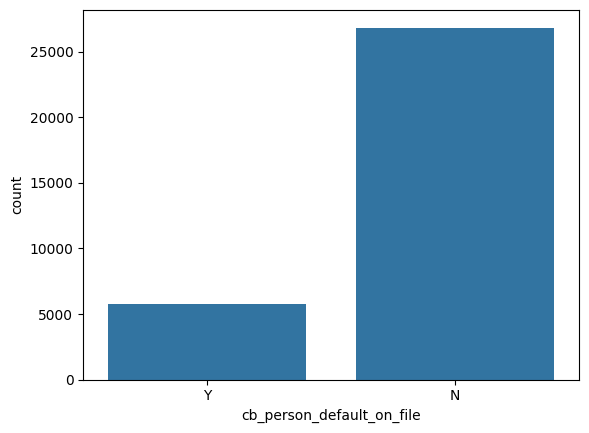

In [53]:
sns.countplot(x = base_credit['cb_person_default_on_file']);

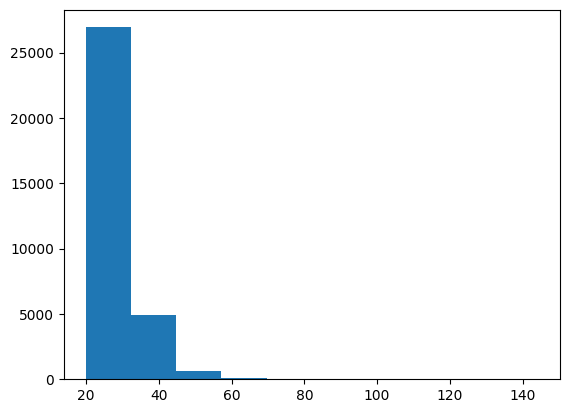

In [54]:
plt.hist(x = base_credit['person_age']);

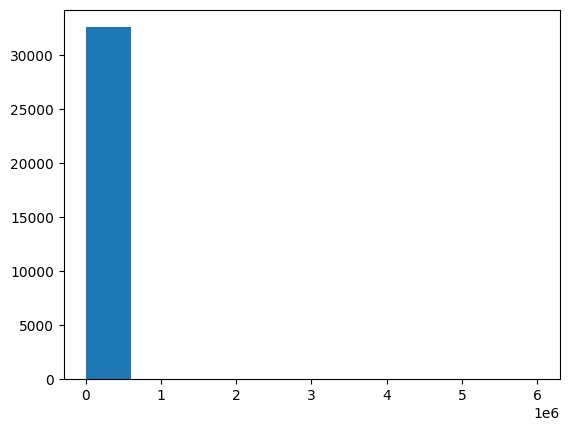

In [55]:
plt.hist(x = base_credit['person_income']);

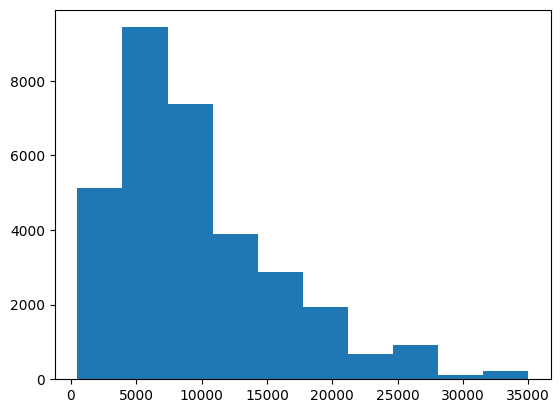

In [56]:
plt.hist(x = base_credit['loan_amnt']);

In [57]:
grafico = px.scatter_matrix(base_credit, dimensions=['person_age', 'person_income', 'loan_amnt'], color = 'cb_person_default_on_file')
grafico.show()

### Tratamento de valores inconsistentes e faltantes


> Limpeza de dados

> Remoção de inconsistências

> Organização dos tipos








In [58]:
base_credit.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [59]:
base_credit.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [60]:
missing_values = base_credit.isna().sum()
missing_values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [61]:
duplicates = base_credit.duplicated().sum()
duplicates


np.int64(165)

In [62]:

df = base_credit.copy()

# Apenas colunas numéricas
df_num = df.select_dtypes(include="number")

# Calcular Q1, Q3 e IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Mascara booleana de outliers
outlier_mask = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

# Quantos outliers por coluna numerica
outliers_por_coluna = outlier_mask.sum().sort_values(ascending=False)

# Linhas do dataset original que têm pelo menos 1 outlier em alguma coluna numerica
linhas_com_outlier = df[outlier_mask.any(axis=1)]

outliers_por_coluna, linhas_com_outlier

(loan_status                   7108
 loan_amnt                     1689
 person_age                    1494
 person_income                 1484
 cb_person_cred_hist_length    1142
 person_emp_length              853
 loan_percent_income            651
 loan_int_rate                    6
 dtype: int64,
        person_age  person_income person_home_ownership  person_emp_length  \
 0              22          59000                  RENT              123.0   
 2              25           9600              MORTGAGE                1.0   
 3              23          65500                  RENT                4.0   
 4              24          54400                  RENT                8.0   
 5              21           9900                   OWN                2.0   
 ...           ...            ...                   ...                ...   
 32576          57          53000              MORTGAGE                1.0   
 32577          54         120000              MORTGAGE                4.

In [63]:
# Apagar somente os registros com valores inconsistentes
base_credit_clean = base_credit.dropna()
base_credit_clean.describe()


person_age  person_income  person_emp_length     loan_amnt  \
count  28638.000000   2.863800e+04       28638.000000  28638.000000   
mean      27.727216   6.664937e+04           4.788672   9656.493121   
std        6.310441   6.235645e+04           4.154627   6329.683361   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.595600e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28638.000000  28638.000000         28638.000000   
mean       11.039867      0.216600             0.169488   
std         3.229372      0.411935             0.106393   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                28638.000000  
mean                     5.793736  
std                      4.038483  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [64]:
# Converter colunas para numerico
base_credit['person_age'] = pd.to_numeric(base_credit['person_age'], errors='coerce')
base_credit['person_income'] = pd.to_numeric(base_credit['person_income'], errors='coerce')
base_credit['loan_amnt'] = pd.to_numeric(base_credit['loan_amnt'], errors='coerce')
base_credit['loan_int_rate'] = pd.to_numeric(base_credit['loan_int_rate'], errors='coerce')


In [65]:
df_num = base_credit.select_dtypes(include='number')
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [66]:
# Identificar outliers
outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

# Remover as linhas com outliers
base_credit_clean = base_credit[~outliers.any(axis=1)]


In [67]:
base_credit_clean.describe()
base_credit_clean.isna().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              554
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2061
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [68]:
base_credit_clean2 = base_credit_clean.dropna(subset=['person_emp_length', 'loan_int_rate'])
base_credit_clean2


person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
23             24          10980                   OWN                0.0   
27             23          11000                   OWN                0.0   
65             22          12000              MORTGAGE                7.0   
96             24          12360                   OWN                2.0   
...           ...            ...                   ...                ...   
32251          36          61000              MORTGAGE                2.0   
32257          37          21600                  RENT                7.0   
32261          37          46680              MORTGAGE                6.0   
32290          37          90000              MORTGAGE               11.0   
32293          38         110000              MORTGAGE                5.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1              EDUCATION          B       1000          11.14            0   
23              PERSONAL          A       1500           7.29            0   
27              PERSONAL          A       1400           9.32            0   
65             EDUCATION          D       1500          14.84            0   
96               MEDICAL          C       1600          13.57            0   
...                  ...        ...        ...            ...          ...   
32251            VENTURE          B      10000          10.25            0   
32257            MEDICAL          B       3000          12.18            0   
32261            VENTURE          D       8000          15.21            0   
32290  DEBTCONSOLIDATION          A       4000           6.62            0   
32293            MEDICAL          B      16000          11.99            0   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
23                    0.14                         N   
27                    0.13                         N   
65                    0.13                         Y   
96                    0.13                         N   
...                    ...                       ...   
32251                 0.16                         N   
32257                 0.14                         N   
32261                 0.17                         N   
32290                 0.04                         N   
32293                 0.15                         N   

       cb_person_cred_hist_length  
1                               2  
23                              3  
27                              3  
65                              3  
96                              3  
...                           ...  
32251                          14  
32257                          14  
32261                          15  
32290                          15  
32293                          13  

[18839 rows x 12 columns]

In [69]:
base_credit_clean2.isna().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [70]:
base_credit = base_credit.drop_duplicates().copy()
base_credit.duplicated().sum()

base_credit.shape
base_credit.isna().sum()
base_credit.duplicated().sum()
base_credit.dtypes



person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [71]:
missing_values2 = base_credit.isnull().sum().sort_values(ascending=False)
missing_values2

loan_int_rate                 3095
person_emp_length              887
person_income                    0
person_age                       0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [72]:
base_credit['loan_int_rate'].fillna(base_credit['loan_int_rate'].mean(), inplace=True)
base_credit['person_emp_length'].fillna(base_credit['person_emp_length'].mean(), inplace=True)
base_credit[['loan_int_rate', 'person_emp_length']].isna().sum()



/tmp/ipython-input-898000553.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-898000553.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

loan_int_rate        0
person_emp_length    0
dtype: int64

### Divisão entre previsores e classe

In [73]:
base_credit.columns


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [74]:
X_credit = base_credit.drop(columns=['loan_status'])
y_credit = base_credit['loan_status']


### Escalonamento dos valores

In [75]:
X_credit.select_dtypes(include='number').agg(['min', 'max'])


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
min          20           4000                0.0        500           5.42   
max         144        6000000              123.0      35000          23.22   

     loan_percent_income  cb_person_cred_hist_length  
min                 0.00                           2  
max                 0.83                          30

In [76]:
X_num = X_credit.select_dtypes(include='number')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

In [77]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled_df.agg(['min', 'max'])

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
min   -1.219233      -1.001242          -1.171757  -1.438300      -1.815530   
max   18.296027      95.685630          28.913989   4.018287       3.958081   

     loan_percent_income  cb_person_cred_hist_length  
min            -1.593946                   -0.938982  
max             6.176838                    5.959324

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

In [78]:
data_path  = "/content/adult.data"
test_path  = "/content/adult.test"

# Adicionando colunas - No df não tinha
cols = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]

# Treino (adult.data)
train = pd.read_csv(
    data_path,
    header=None,
    names=cols,
    sep=",",
    skipinitialspace=True,
    na_values="?"
)

# Teste (adult.test): pular linhas que começam com "|"
test = pd.read_csv(
    test_path,
    header=None,
    names=cols,
    sep=",",
    skipinitialspace=True,
    na_values="?",
    comment="|"
)

# No arquivo de teste, a classe vem com "." no final: "<=50K." e ">50K."
test["income"] = test["income"].str.replace(".", "", regex=False)

train, test


(       age         workclass  fnlwgt   education  education-num  \
 0       39         State-gov   77516   Bachelors             13   
 1       50  Self-emp-not-inc   83311   Bachelors             13   
 2       38           Private  215646     HS-grad              9   
 3       53           Private  234721        11th              7   
 4       28           Private  338409   Bachelors             13   
 ...    ...               ...     ...         ...            ...   
 32556   27           Private  257302  Assoc-acdm             12   
 32557   40           Private  154374     HS-grad              9   
 32558   58           Private  151910     HS-grad              9   
 32559   22           Private  201490     HS-grad              9   
 32560   52      Self-emp-inc  287927     HS-grad              9   
 
            marital-status         occupation   relationship   race     sex  \
 0           Never-married       Adm-clerical  Not-in-family  White    Male   
 1      Married-civ-spou

In [79]:
base_census = pd.concat([train, test], axis=0, ignore_index=True)
base_census.shape

(48842, 15)

In [80]:
base_census

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country income  
0      United-States  <=50K  
1      United-States  <=50K  
2      United-States  <=50K  
3      United-States  <=50K  
4               Cuba  <=50K  
...              ...    ...  
48837  United-States  <=50K  
48838  United-States  <=50K  
48839  United-States  <=50K  
48840  United-States  <=50K  
48841  United-States   >50K  

[48842 rows x 15 columns]

In [81]:
base_census.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [82]:
base_census.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

## Visualização dos dados

In [83]:
np.unique(base_census['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([37155, 11687]))

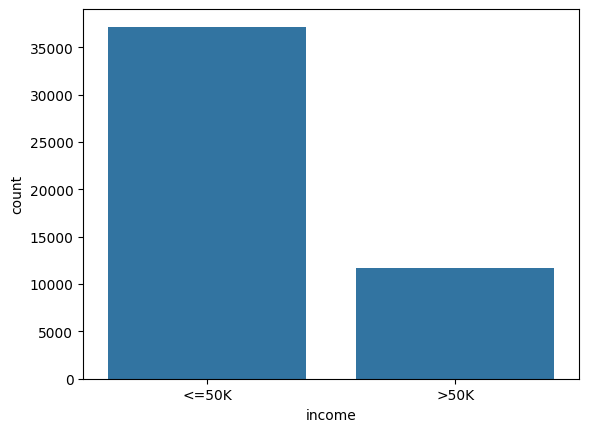

In [84]:
sns.countplot(x = base_census['income']);

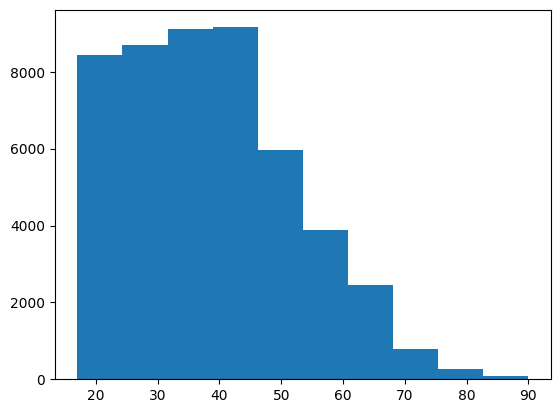

In [85]:
plt.hist(x = base_census['age']);

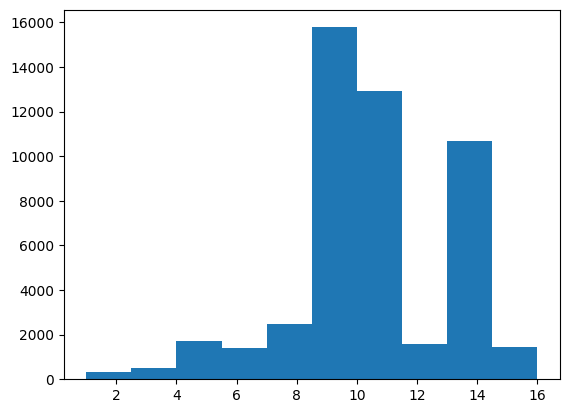

In [86]:
plt.hist(x = base_census['education-num']);

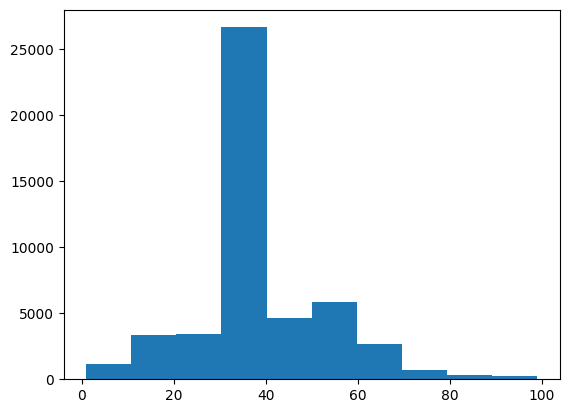

In [87]:
plt.hist(x = base_census['hours-per-week']);

In [88]:
df_plot = base_census.dropna(subset=['workclass', 'age'])

grafico = px.treemap(
    df_plot,
    path=['workclass'],
    values='age'
)
grafico.show()

In [89]:
df_plot = base_census.dropna(subset=['occupation', 'relationship'])

grafico = px.treemap(
    df_plot,
    path=['occupation', 'relationship']
)
grafico.show()


In [90]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [91]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [92]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe

In [93]:
base_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [94]:
X_census = base_census.drop(columns=['income'])
y_census = base_census['income']


In [95]:
y_census

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

## Tratamento de atributos categóricos

### LabelEncoder

In [96]:
from sklearn.preprocessing import LabelEncoder

#Fazendo LabelEncoder para coluna workclass
le_workclass = LabelEncoder()
base_census['workclass'] = le_workclass.fit_transform(base_census['workclass'])


In [97]:
base_census['workclass']
#le_workclass.classes_

0        6
1        5
2        3
3        3
4        3
        ..
48837    3
48838    8
48839    3
48840    3
48841    4
Name: workclass, Length: 48842, dtype: int64

In [98]:
#Fazendo LabelEncoder para as outras colunas

categoricas = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country'
]

encoders = {}

for col in categoricas:
    le = LabelEncoder()
    base_census[col] = le.fit_transform(base_census[col].fillna('Unknown'))
    encoders[col] = le

In [99]:
base_census[categoricas].head()

workclass  education  marital-status  occupation  relationship  race  sex  \
0          6          9               4           0             1     4    1   
1          5          9               2           3             0     4    1   
2          3         11               0           5             1     4    1   
3          3          1               2           5             0     2    1   
4          3          9               2           9             5     2    0   

   native-country  
0              38  
1              38  
2              38  
3              38  
4               4

### OneHotEncoder

In [100]:
len(np.unique(base_census['workclass']))

9

In [101]:
len(np.unique(base_census['occupation']))

15

In [102]:
base_census.dtypes


age                int64
workclass          int64
fnlwgt             int64
education          int64
education-num      int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income            object
dtype: object

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [104]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [105]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [106]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [107]:
X_census.shape

(48842, 108)

## Escalonamento dos valores

In [108]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [109]:
X_census[0]

array([-1.73794701e-01, -2.61939756e-01, -1.43102672e-02, -1.50668036e+00,
       -1.89608507e-01, -2.93019423e-01,  4.86366370e+00, -2.07398835e-02,
       -2.46558309e-01, -1.71087896e-01, -1.96287032e-01, -1.16768783e-01,
       -7.12939510e-02, -1.02621183e-01, -1.41218915e-01, -1.25386729e-01,
       -1.84092512e-01, -2.09896040e-01,  2.25526729e+00, -1.10956708e-01,
       -6.90987591e-01, -2.39853082e-01, -4.12583306e-02, -1.31803280e-01,
       -5.35289279e-01, -3.96417179e-01, -2.75339617e-02, -9.19603890e-01,
       -1.14128272e-01,  1.42494376e+00, -1.79829138e-01, -1.79099826e-01,
        2.77573184e+00, -1.75273238e-02, -3.78203224e-01, -3.77283176e-01,
       -1.77387891e-01, -2.10480172e-01, -2.56814587e-01, -3.34802503e-01,
       -7.05650329e-02, -3.80322166e-01, -1.43316089e-01, -3.56372989e-01,
       -1.74667981e-01, -2.25076263e-01, -2.47025183e-01, -8.22752067e-01,
        1.69752357e+00, -1.78367904e-01, -4.28640669e-01, -3.42390542e-01,
       -2.23868659e-01, -

# Divisão das bases em treinamento e teste

In [110]:
from sklearn.model_selection import train_test_split

## Credit data

In [111]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [112]:
X_credit_treinamento.shape

(24312, 11)

In [113]:
y_credit_treinamento.shape

(24312,)

In [114]:
X_credit_teste.shape, y_credit_teste.shape

((8104, 11), (8104,))

## Census

In [115]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [116]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [117]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

## Salvar as variáveis

In [118]:
import pickle

In [119]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [120]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')